In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.style as style
from tqdm import tqdm 
tqdm.pandas()
plt.rcParams.update({'axes.labelsize':16})
plt.rcParams.update({'axes.titlesize':16})
plt.rcParams.update({'legend.fontsize':16})
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['lines.linewidth'] = 4
style.use('ggplot')
import os
os.chdir('../')
from python_code import simple_gibbs
os.chdir('notebooks')
from sklearn.decomposition import PCA

In [24]:
df = pd.read_csv('all_data.csv')
grouped_df = df.groupby('department_name')
groups = list(grouped_df.groups.keys())

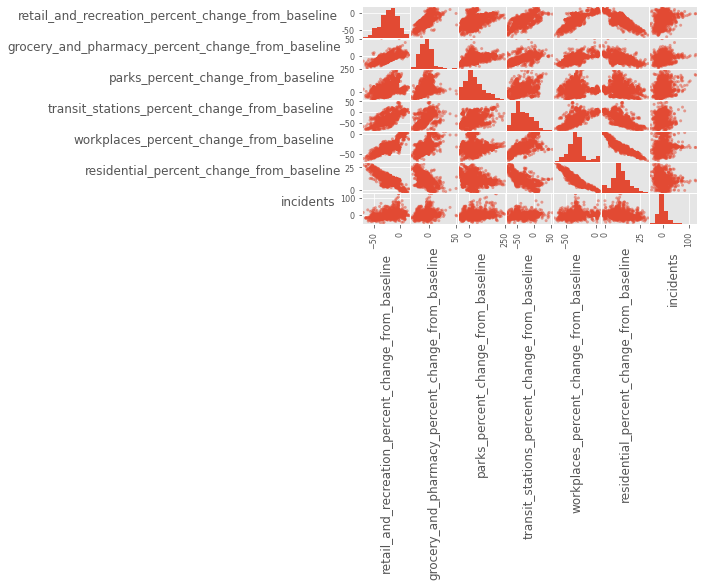

In [25]:
#plt.figure(figsize=(20,20))
#plt.rcParams['figure.figsize'] = 20,20
axes=pd.plotting.scatter_matrix(df)
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right');

In [26]:
df.columns[1:-2]

Index(['retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline'],
      dtype='object')

In [27]:
df_ = pd.DataFrame(data=X_depts[0][:,1:])
idx = np.r_[0:4,5:8]
df_.columns = df.columns[idx][1:-1]
#pd.plotting.scatter_matrix(df_)
axes = pd.plotting.scatter_matrix(df_, alpha=0.2)
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right');

ValueError: Length mismatch: Expected axis has 2 elements, new values have 5 elements

In [ ]:

#pd.plotting.scatter_matrix(X_depts[0][:,1:])

In [28]:
a=list(df.columns[idx][1:-1]) + list(range(1,6))


In [29]:
idx = np.r_[0:4,5:8]
cols=list(df.columns[idx][1:-1]) + list(range(1,6))
df_ = pd.DataFrame(data=np.hstack([X[:,1:], X_transform]))
df_.columns = cols

ValueError: Length mismatch: Expected axis has 7 elements, new values have 10 elements

In [30]:
np.abs(df_.corr()[cols[5:]].iloc[0:5]) > 0.5

1      2      3      4      5
0   True   True   True  False   True
1   True   True   True  False   True
2   True   True   True  False   True
3   True   True   True  False   True
4  False  False  False  False  False

/var/folders/5t/ltqvfkd124z1n5v3ntgw77d40000gn/T/ipykernel_7299/1721531212.py:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


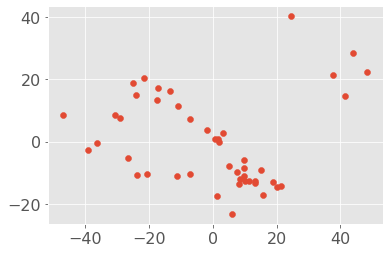

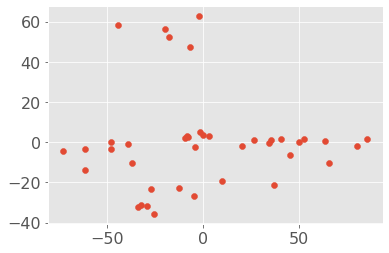

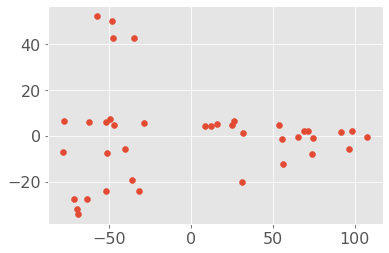

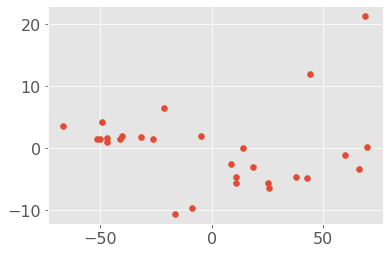

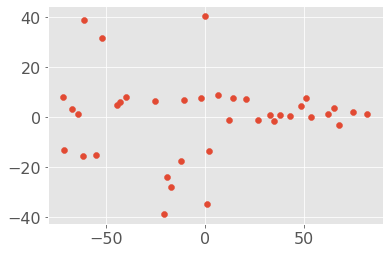

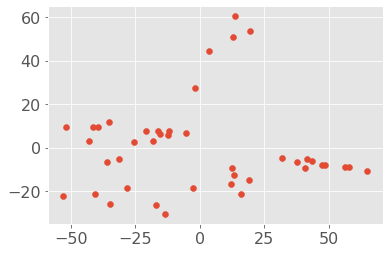

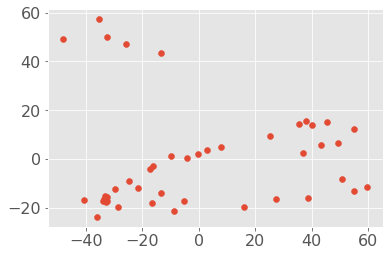

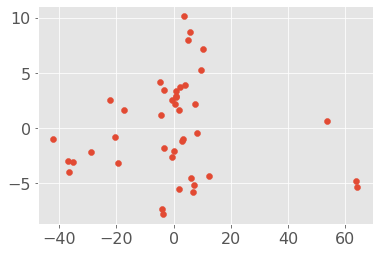

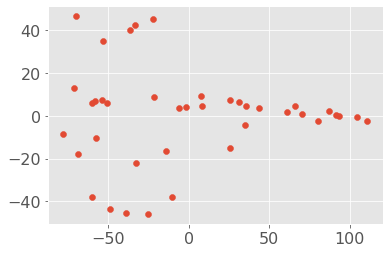

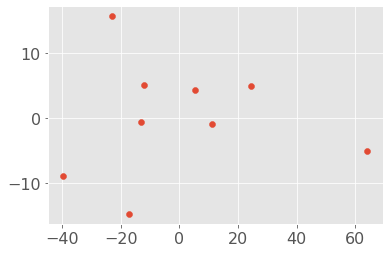

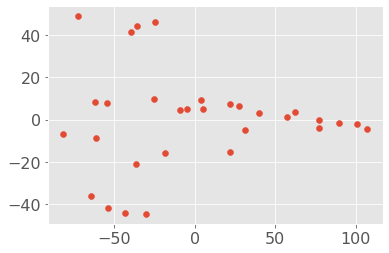

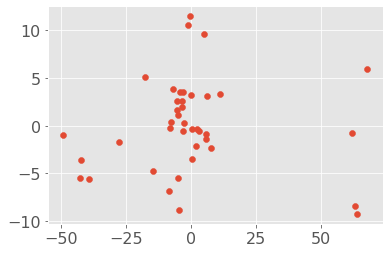

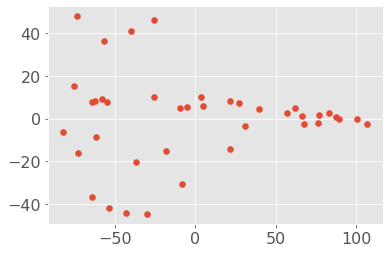

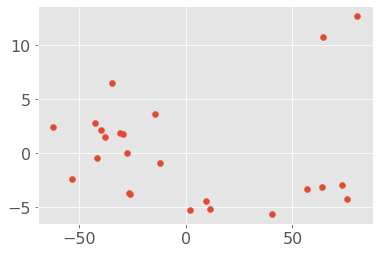

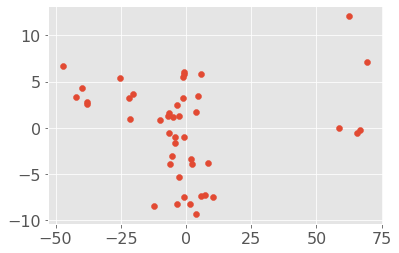

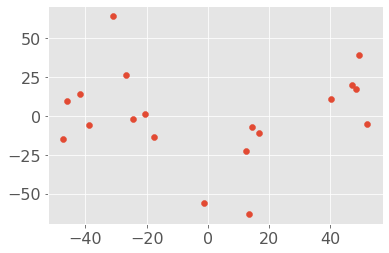

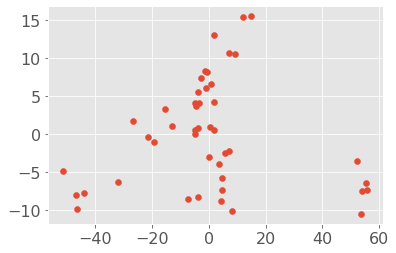

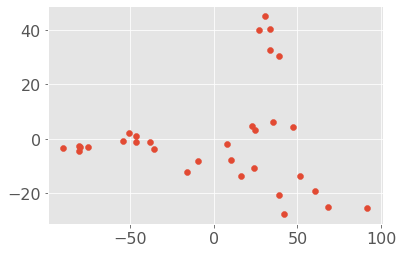

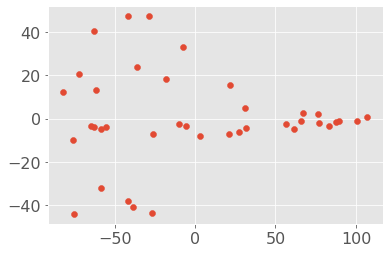

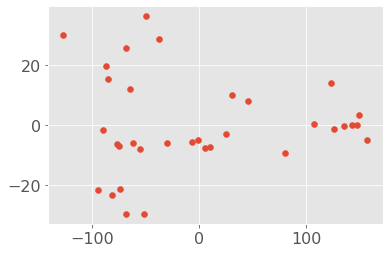

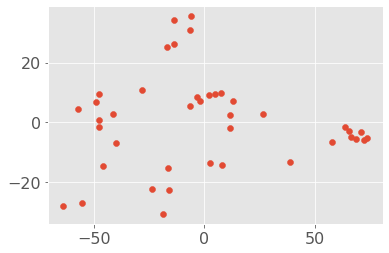

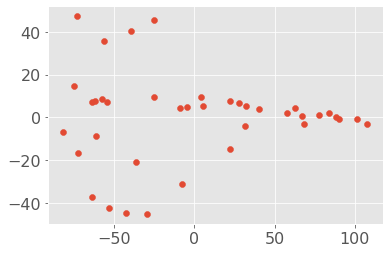

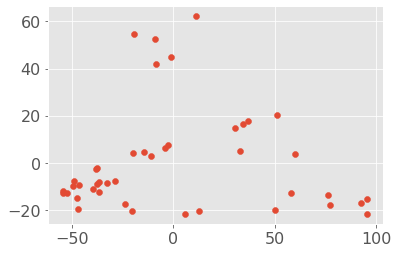

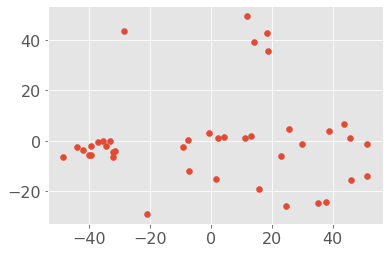

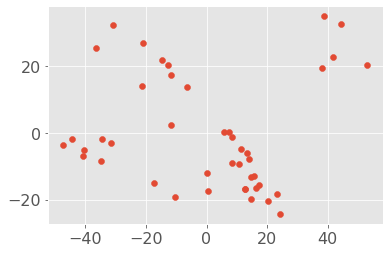

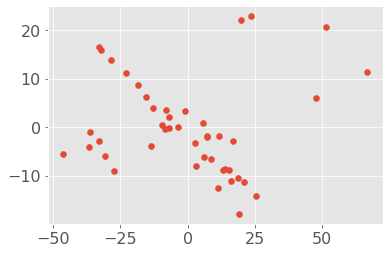

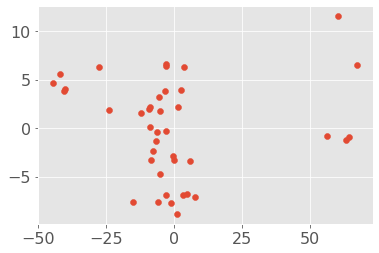

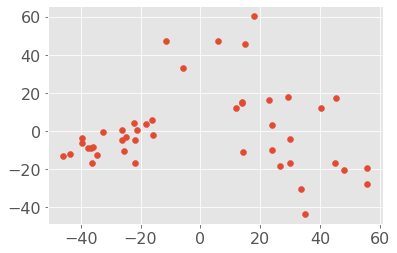

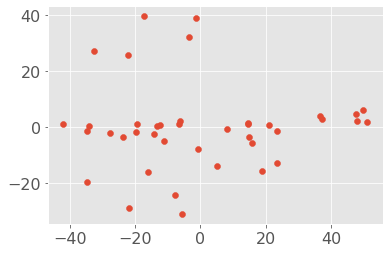

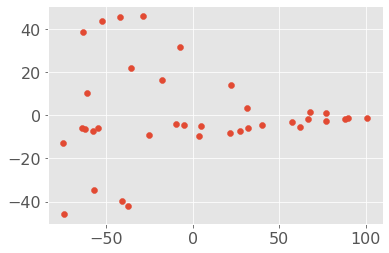

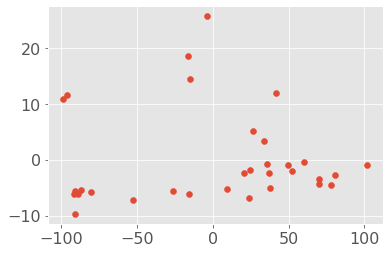

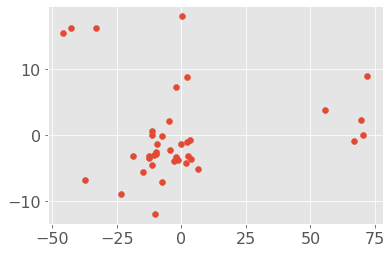

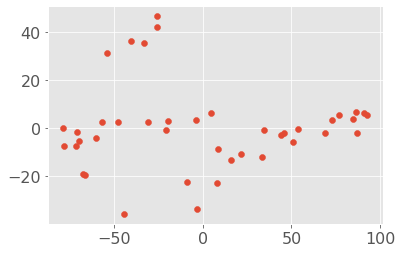

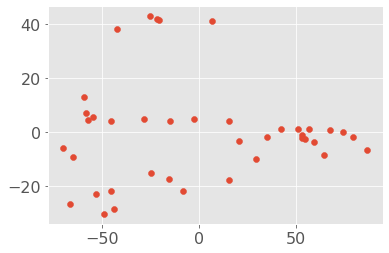

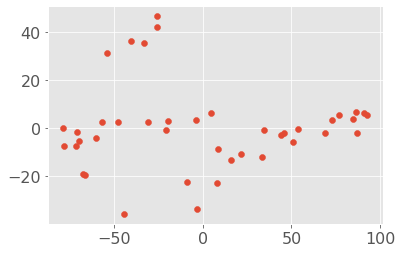

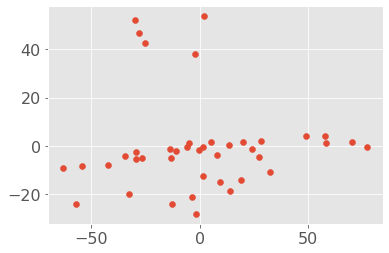

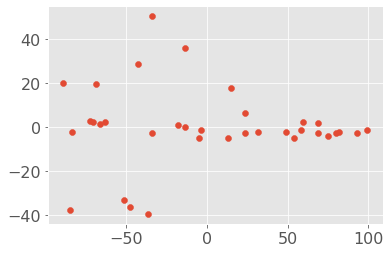

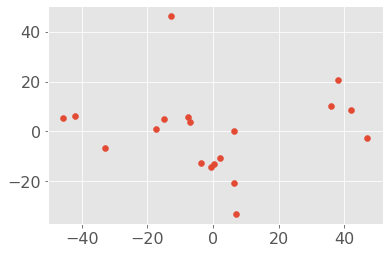

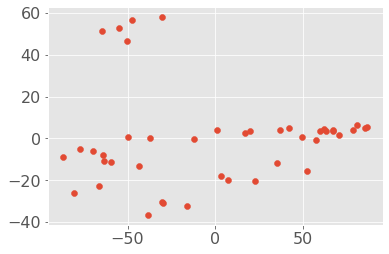

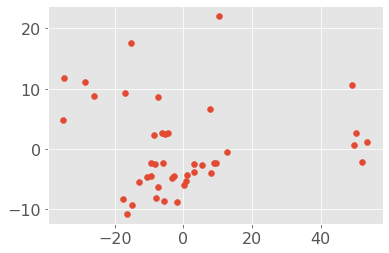

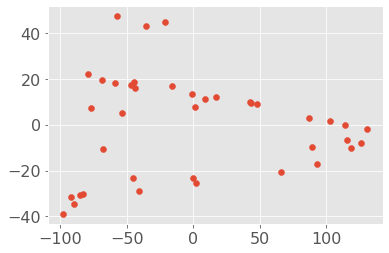

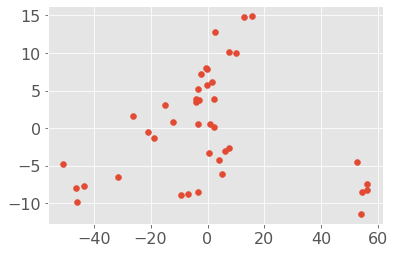

<Figure size 432x288 with 0 Axes>

In [41]:
X_depts, y_depts = [], []
pca = PCA(n_components=2)
df_corrs = []
components = []
for n, dept in enumerate(groups):
    df_dept = grouped_df.get_group(dept)
    df_dept = df_dept.sort_values('date')
    X = df_dept['incidents'].to_numpy().reshape(-1,1)
    idx = np.r_[0:4,5:8]
    df_dept = df_dept[df_dept.columns[idx]].dropna()
    X = df_dept[df_dept.columns[1:-1]].to_numpy()
    y = df_dept[df_dept.columns[-1]].to_numpy().reshape(-1,1)
    X_transform = pca.fit_transform(X) 
    
    #idx = np.r_[0:4,5:8]
    #cols=list(df.columns[idx][1:-1]) + list(range(1,6))
    #df_ = pd.DataFrame(data=np.hstack([X, X_transform]))
    #df_.columns = cols
    #df_corrs.append((df_.corr()[cols[5:]].iloc[0:5]))
    plt.scatter(X_transform[:,0], X_transform[:,1])
    col = np.ones(X.shape[0]).reshape(-1,1)
    X_transform = np.hstack((col, X_transform))
    #X_transform = pca.fit_transform(X)   
    X_depts.append(X_transform)
    y_depts.append(y.flatten())
    components.append(pca.components_)
    plt.figure()

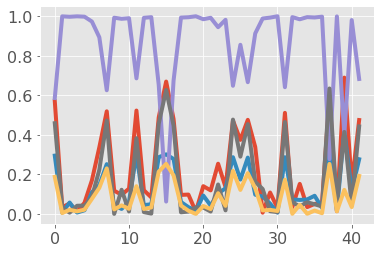

In [55]:
plt.plot(np.abs(np.concatenate(components).reshape(42,2,5)[:,0,:]))

In [47]:
df.columns

Index(['date', 'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline', 'incidents',
       'department_name'],
      dtype='object')

In [21]:
df_concat = pd.concat(df_corrs)
by_row_index = df_concat.groupby(df_concat.index)
df_means = by_row_index.median()
df_means

ValueError: No objects to concatenate

In [22]:
gb = simple_gibbs.GibbsSampler(X_depts, y_depts)
gb.fit()

TypeError: __init__() missing 1 required positional argument: 'time_vecs'

In [9]:
plt.plot(betas[0,:]);
plt.figure()
plt.plot(betas[1,:]);

NameError: name 'betas' is not defined

/var/folders/5t/ltqvfkd124z1n5v3ntgw77d40000gn/T/ipykernel_11719/585531773.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


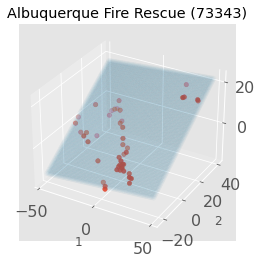

<Figure size 432x288 with 0 Axes>

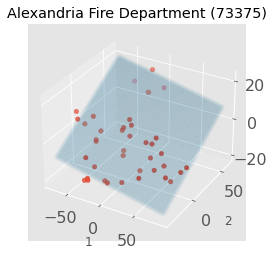

<Figure size 432x288 with 0 Axes>

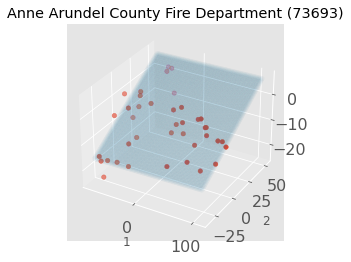

<Figure size 432x288 with 0 Axes>

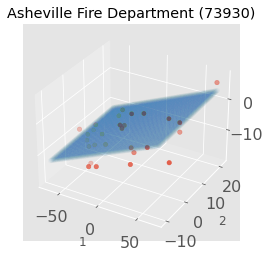

<Figure size 432x288 with 0 Axes>

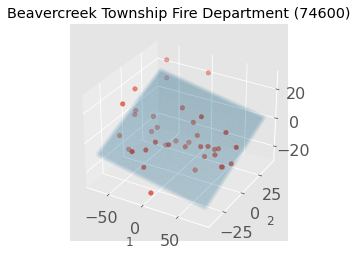

<Figure size 432x288 with 0 Axes>

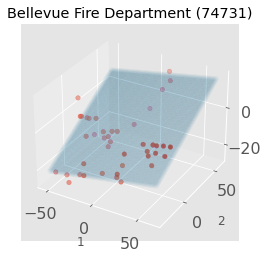

<Figure size 432x288 with 0 Axes>

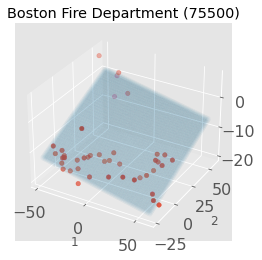

<Figure size 432x288 with 0 Axes>

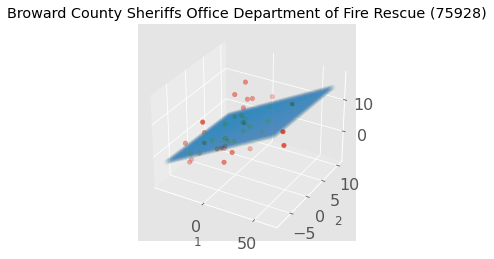

<Figure size 432x288 with 0 Axes>

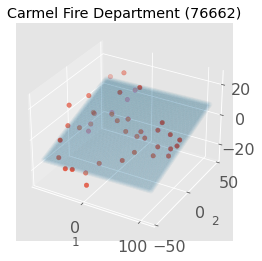

<Figure size 432x288 with 0 Axes>

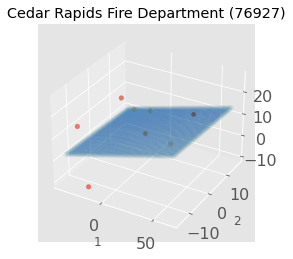

<Figure size 432x288 with 0 Axes>

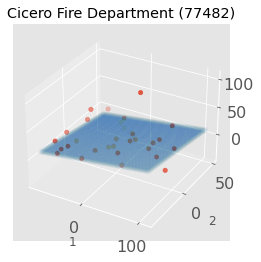

<Figure size 432x288 with 0 Axes>

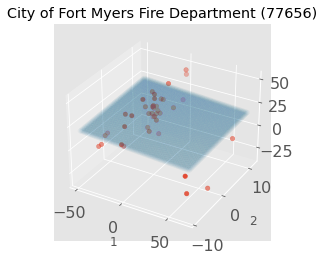

<Figure size 432x288 with 0 Axes>

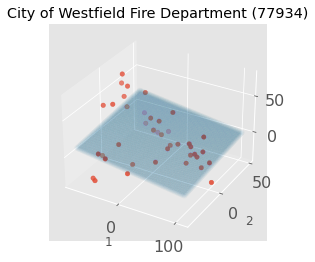

<Figure size 432x288 with 0 Axes>

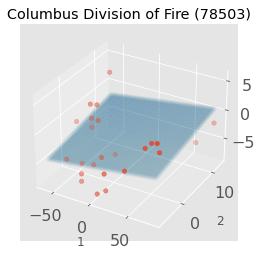

<Figure size 432x288 with 0 Axes>

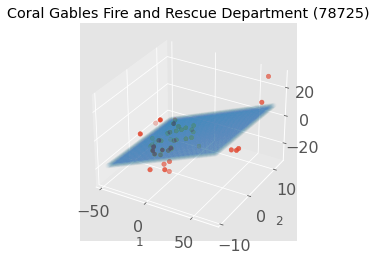

<Figure size 432x288 with 0 Axes>

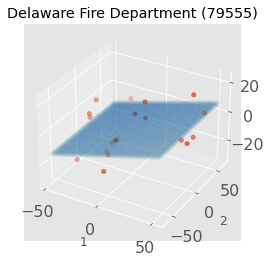

<Figure size 432x288 with 0 Axes>

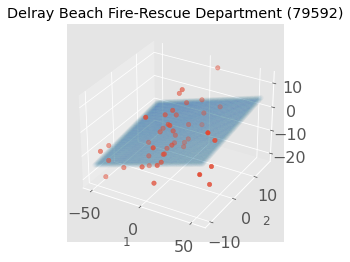

<Figure size 432x288 with 0 Axes>

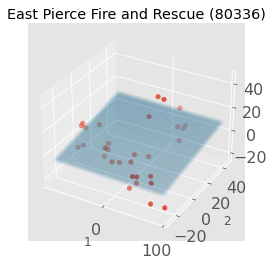

<Figure size 432x288 with 0 Axes>

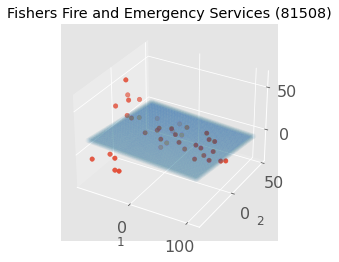

<Figure size 432x288 with 0 Axes>

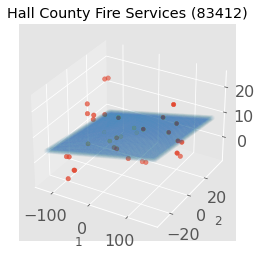

<Figure size 432x288 with 0 Axes>

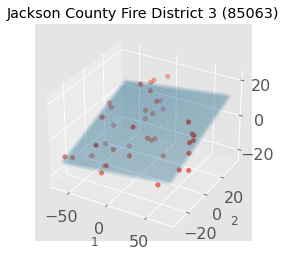

<Figure size 432x288 with 0 Axes>

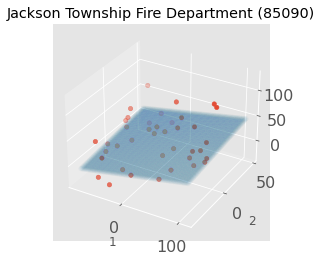

<Figure size 432x288 with 0 Axes>

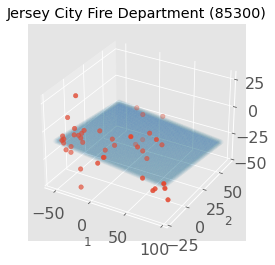

<Figure size 432x288 with 0 Axes>

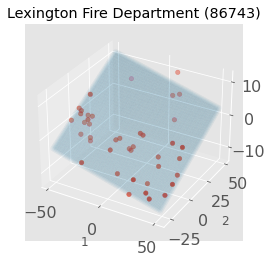

<Figure size 432x288 with 0 Axes>

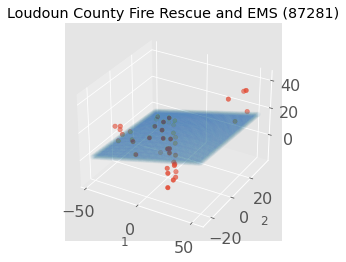

<Figure size 432x288 with 0 Axes>

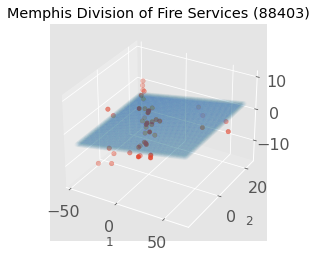

<Figure size 432x288 with 0 Axes>

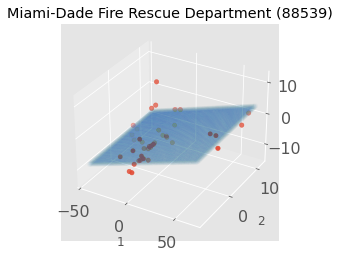

<Figure size 432x288 with 0 Axes>

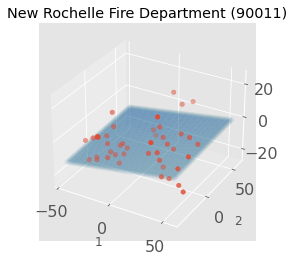

<Figure size 432x288 with 0 Axes>

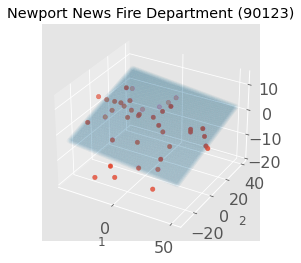

<Figure size 432x288 with 0 Axes>

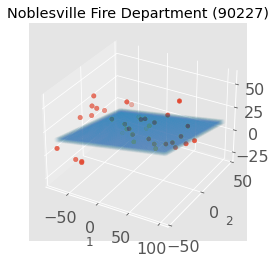

<Figure size 432x288 with 0 Axes>

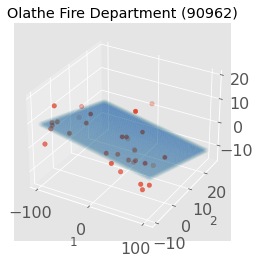

<Figure size 432x288 with 0 Axes>

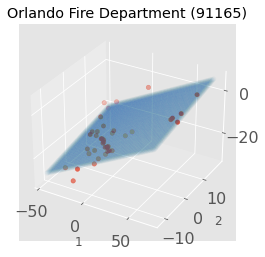

<Figure size 432x288 with 0 Axes>

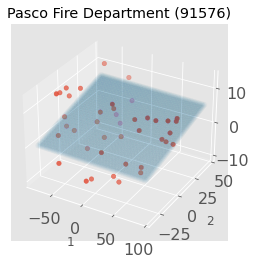

<Figure size 432x288 with 0 Axes>

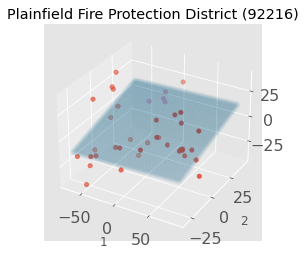

<Figure size 432x288 with 0 Axes>

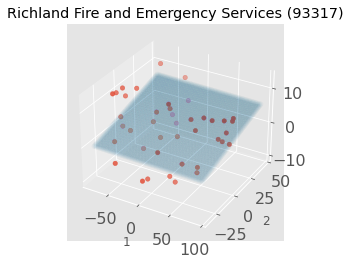

<Figure size 432x288 with 0 Axes>

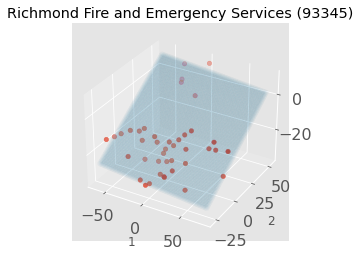

<Figure size 432x288 with 0 Axes>

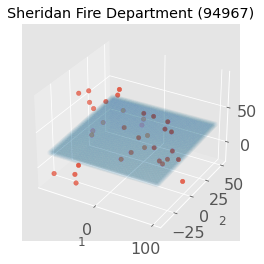

<Figure size 432x288 with 0 Axes>

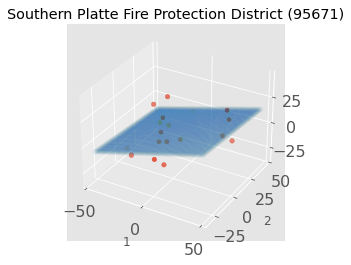

<Figure size 432x288 with 0 Axes>

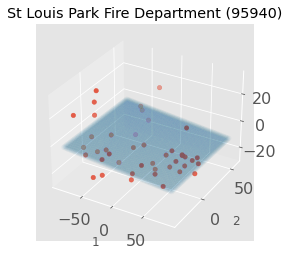

<Figure size 432x288 with 0 Axes>

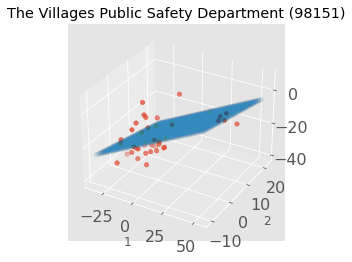

<Figure size 432x288 with 0 Axes>

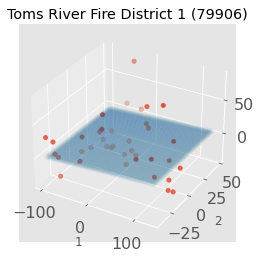

<Figure size 432x288 with 0 Axes>

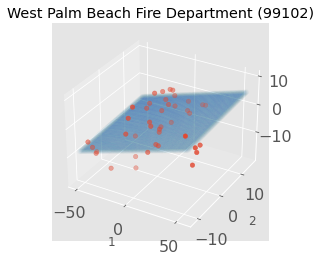

<Figure size 432x288 with 0 Axes>

In [10]:
#plt.figure(figsize=(8, 160))
betas = gb.traces['betas'].mean(axis=0)
for n in range(len(groups)):

    x_1 = np.linspace(X_depts[n][:,1].min(), X_depts[n][:,1].max(), 100).reshape(-1,1)
    x_2 = np.linspace(X_depts[n][:,2].min(), X_depts[n][:,2].max(), 100).reshape(-1,1)
    xx1, xx2 = np.meshgrid(x_1, x_2)
    xi = np.ones(len(xx1.flatten()))
    x_plot = np.hstack((xi.reshape(-1,1), xx1.flatten().reshape(-1,1), xx2.flatten().reshape(-1,1)))
    y_pred = x_plot@betas[:, n]
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.scatter(X_depts[n][:,1], X_depts[n][:,2], y_depts[n])
    ax.scatter(xx1.flatten(), xx2.flatten(), y_pred, alpha=.02)
    ax.set_title(groups[n])
    ax.set_xlabel('1')
    ax.set_ylabel('2')
    
    plt.figure()
    
    
#plt.tight_layout()
#plt.savefig('basic_results.png',bbox_inches='tight')

Albuquerque Fire Rescue (73343)
[0.54292784 0.04834661 0.49124068]
Alexandria Fire Department (73375)
[-3.36610071 -0.07864418  0.27879129]
Anne Arundel County Fire Department (73693)
[-6.83494929e+00  4.29815575e-03  2.53292809e-01]
Asheville Fire Department (73930)
[-4.74632378  0.10831526  0.02002576]
Beavercreek Township Fire Department (74600)
[-3.32805462 -0.08821231  0.30240925]
Bellevue Fire Department (74731)
[-7.4739279   0.08378723  0.30055558]
Boston Fire Department (75500)
[-11.70704056  -0.06959919   0.16000792]
Broward County Sheriffs Office Department of Fire Rescue (75928)
[ 4.39482597  0.16927682 -0.07229509]
Carmel Fire Department (76662)
[-3.0891967   0.00833075  0.22350041]
Cedar Rapids Fire Department (76927)
[ 6.43987378  0.13223781 -0.07889234]
Cicero Fire Department (77482)
[11.11118832  0.12707267 -0.26210386]
City of Fort Myers Fire Department (77656)
[18.22785829 -0.05976142  0.15705579]
City of Westfield Fire Department (77934)
[ 7.27997482 -0.10505184  0.1

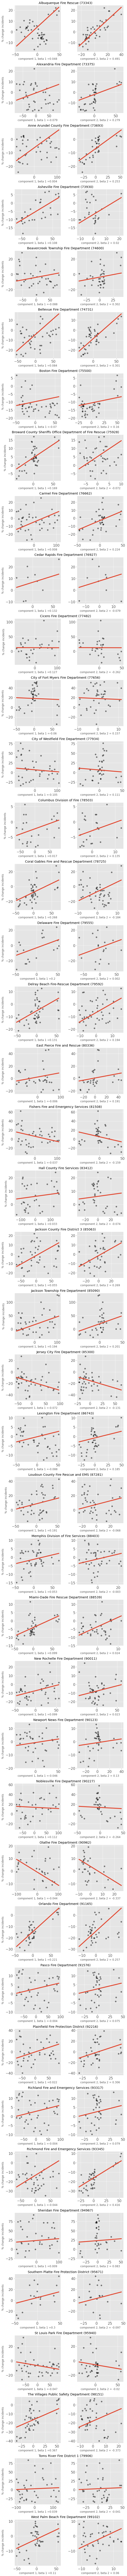

In [11]:
plt.figure(figsize=(8, 160))
betas = gb.traces['betas'].mean(axis=0)
for n in range(len(groups)):
    plt.subplot(len(groups), 2, 2*n + 1)
    plt.title(groups[n], x=1.1)
    plt.scatter(X_depts[n][:,1], y_depts[n], color='black', alpha=.5)
    x_1 = np.linspace(X_depts[n][:,1].min(), X_depts[n][:,1].max(), 100).reshape(-1,1)
    x_2 = np.linspace(X_depts[n][:,2].min(), X_depts[n][:,2].max(), 100).reshape(-1,1)
    xi = np.ones(100).reshape(-1,1)
    y_pred = np.hstack((xi, x_1, x_2))@betas[:, n]
    plt.plot(x_1, y_pred)
    plt.xlabel(f'component 1, beta 1 ={np.round(betas[1,n],3)}')
    plt.ylabel('% change incidents')
    print(groups[n])
    print(betas[:,n])
    
  
    plt.subplot(len(groups), 2, 2*n + 2)
    plt.scatter(X_depts[n][:,2], y_depts[n], color='black', alpha=.5)
    plt.plot(x_2, y_pred)
    plt.xlabel(f'component 2, beta 2 = {np.round(betas[2,n],3)}')
plt.tight_layout()
plt.savefig('basic_results.png',bbox_inches='tight')


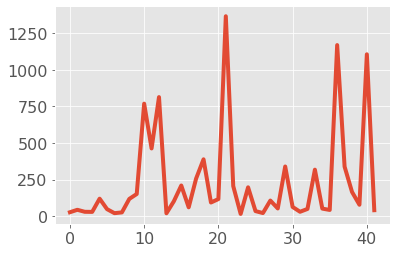

In [12]:
plt.plot(gb.traces['sigmas_squared'].mean(axis=0))

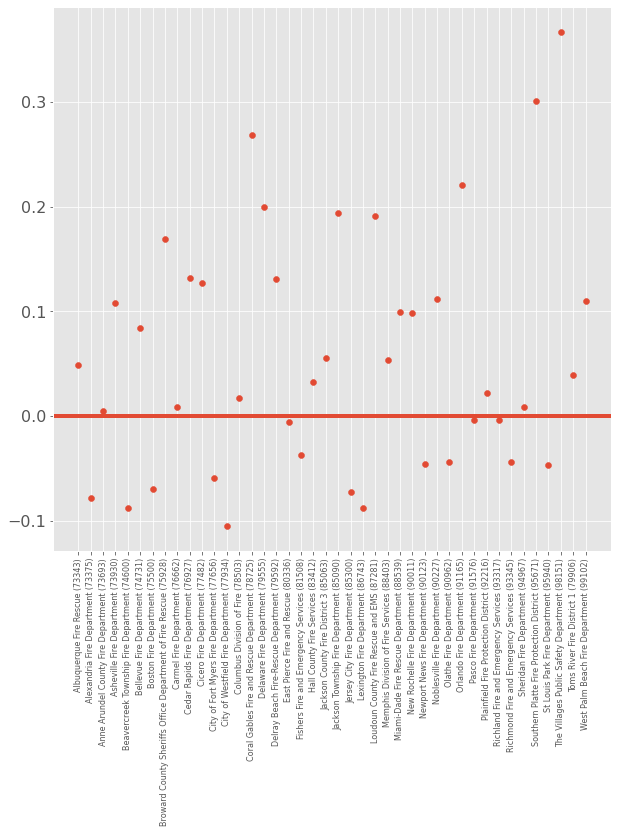

In [13]:
plt.figure(figsize=(10, 10))

x = groups
plt.scatter(x, gb.traces['betas'][:,1,:].mean(axis=0));
plt.axhline(y=0)
plt.xticks(rotation=90, fontsize=8);

In [14]:
gb.traces['mu'].mean(axis=0)

array([0.00091755, 0.00244039, 0.00137605])

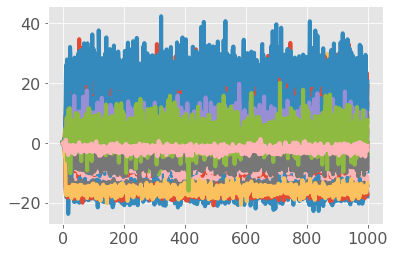

In [15]:
plt.plot(gb.traces['betas'][:,0,:]);

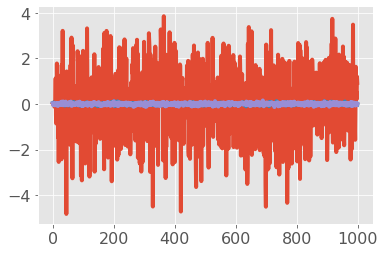

In [16]:
plt.plot(gb.traces['mu']);

In [17]:
gb.traces['mu'].mean(axis=0)

array([0.00091755, 0.00244039, 0.00137605])

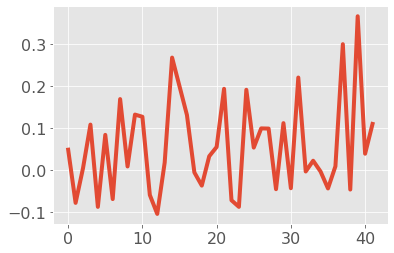

In [18]:
plt.plot(gb.traces['betas'].mean(axis=0)[1,:])

In [19]:
gb.taus

array([6.86512981e+01, 3.65481783e-02, 1.21042550e-01])

In [20]:
gb.betas

array([[ 3.71539689e-01, -3.78811429e+00, -5.00466609e+00,
        -3.61078096e+00, -4.22048417e+00, -4.62265096e+00,
        -1.20806803e+01,  3.81506459e+00, -3.16907575e+00,
        -1.23496199e+00,  1.32362073e+01,  1.98350775e+01,
         7.13868605e+00, -1.84198717e+00, -8.23534233e+00,
        -9.56153602e+00, -5.08550247e+00, -1.11470295e+00,
         4.30639235e+00,  4.31257636e+00, -3.46791306e-01,
         1.89515977e+01, -1.79217171e+01, -8.80379082e-02,
         8.70661068e+00, -3.30840946e+00, -4.32493743e+00,
        -7.29880929e+00, -1.23953669e+00,  1.11970036e+01,
         4.06323667e+00, -1.42217000e+01,  3.02956934e+00,
        -1.01261078e+00,  4.43933920e+00, -1.70900122e+01,
         2.05319211e+01,  2.82025543e+00, -6.14659216e+00,
        -1.34349967e+01,  7.64454303e+00, -1.02478769e+00],
       [ 5.70566943e-02, -9.61679841e-02,  6.25378874e-03,
         1.29669605e-01, -1.12726746e-01,  9.67326569e-02,
        -8.50230551e-02,  1.28297115e-01,  3.53186061e-

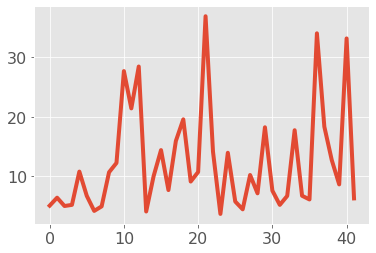

In [21]:
plt.plot(np.sqrt(gb.traces['sigmas_squared'][10:].mean(axis=0
                                                      ) ));

In [ ]:
plt.plot(gb.traces['sigmas_squared'][10:].mean(axis=0))

In [ ]:
plt.hist(gb.traces['sigmas_squared'][10:][:,-2])

In [ ]:
gb.traces['sigmas_squared'].shape

In [ ]:
gb.traces['mu'][0,:][:, None]

In [ ]:
gb.traces['betas'][0,:] - gb.traces['mu'][0,:][:, None]

In [1]:
def hi(**kwargs):
    return kwargs

In [2]:
hi(bandwith=1, hey=2)

{'bandwith': 1, 'hey': 2}

In [3]:
gb = simple_gibbs.GibbsSampler(X_depts, y_depts)

NameError: name 'simple_gibbs' is not defined